<a href="https://colab.research.google.com/github/nomchanz/graduation_thesis_new/blob/main/forwardNN_n4000_rawdata_seed2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# 必要なライブラリのimport
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Input, concatenate
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

In [33]:
# データの準備、読み込み


## データファイルのpath(位置データはrawの方)
no_hole_path = 'no_hole_data.csv'
one_hole_size_path = 'one_hole_size_data.csv'
one_hole_position_path = 'one_hole_position_data_raw.csv'
four_holes_size_path = 'four_holes_size_data.csv'
four_holes_position_path = 'four_holes_position_data_raw.csv'
nine_holes_size_path = 'nine_holes_size_data.csv'
nine_holes_position_path = 'nine_holes_position_data_raw.csv'
sixteen_holes_size_path = 'sixteen_holes_size_data.csv'
sixteen_holes_position_path = 'sixteen_holes_position_data_raw.csv'
twentyfive_holes_size_path = 'twentyfive_holes_size_data.csv'
twentyfive_holes_position_path = 'twentyfive_holes_position_data_raw.csv'


## csvファイルをリスト化

### 穴なしの温度分布データ
with open(no_hole_path) as f0:
  lst_f0 = list(csv.reader(f0))
lst_f0 = [r[:-1] for r in lst_f0]

### 大きさに関するデータ
with open(one_hole_size_path) as fs1:
  lst_fs1 = list(csv.reader(fs1))
with open(four_holes_size_path) as fs2:
  lst_fs2 = list(csv.reader(fs2))
with open(nine_holes_size_path) as fs3:
  lst_fs3 = list(csv.reader(fs3))
with open(sixteen_holes_size_path) as fs4:
  lst_fs4 = list(csv.reader(fs4))
with open(twentyfive_holes_size_path) as fs5:
  lst_fs5 = list(csv.reader(fs5))

### 位置に関するデータ
with open(one_hole_position_path) as fp1:
  lst_fp1 = list(csv.reader(fp1))
with open(four_holes_position_path) as fp2:
  lst_fp2 = list(csv.reader(fp2))
with open(nine_holes_position_path) as fp3:
  lst_fp3 = list(csv.reader(fp3))
with open(sixteen_holes_position_path) as fp4:
  lst_fp4 = list(csv.reader(fp4))
with open(twentyfive_holes_position_path) as fp5:
  lst_fp5 = list(csv.reader(fp5))

In [34]:
# model_1

# データの前処理


## 変数設定(各条件を変えてたくさん試すため)
n = 4000                    #nは総抽出データ数
train = 0.8                 #train:validのtrainデータの割合
seed = 2                       
random.seed(seed)           #乱数seed固定


## データ加工

### データ抽出(各データをランダムにシャッフル→train,valid,testに分割。各大きさのデータが同じ数だけ抽出される。)
for i in range (1,6):
  exec("lst_fs"+str(i)+"_shuffle = random.sample(lst_fs"+str(i)+", len(lst_fs"+str(i)+"))")  
  exec("lst_fs"+str(i)+"_train = lst_fs"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")       
  exec("lst_fs"+str(i)+"_valid = lst_fs"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]")          
  exec("lst_fs"+str(i)+"_test = lst_fs"+str(i)+"_shuffle["+str(int(n/5))+":-1]")
  exec("lst_fp"+str(i)+"_shuffle = random.sample(lst_fp"+str(i)+", len(lst_fp"+str(i)+"))")
  exec("lst_fp"+str(i)+"_train = lst_fp"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")
  exec("lst_fp"+str(i)+"_valid = lst_fp"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]") 
  exec("lst_fp"+str(i)+"_test = lst_fp"+str(i)+"_shuffle["+str(int(n/5))+":-1]")

### train,valid,testの各々について、大きさ、位置、表面温度分布データに分割
for i in range (1,6):
  exec("lst_x_fs"+str(i)+"_train = [r[0] for r in lst_fs"+str(i)+"_train]")
  exec("lst_x_fp"+str(i)+"_train = [r[0:2] for r in lst_fp"+str(i)+"_train]")
  exec("lst_y"+str(i)+"_train = [r[2:-1] for r in lst_fp"+str(i)+"_train]")
  exec("lst_x_fs"+str(i)+"_valid = [r[0] for r in lst_fs"+str(i)+"_valid]")
  exec("lst_x_fp"+str(i)+"_valid = [r[0:2] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_y"+str(i)+"_valid = [r[2:-1] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_x_fs"+str(i)+"_test = [r[0] for r in lst_fs"+str(i)+"_test]")
  exec("lst_x_fp"+str(i)+"_test = [r[0:2] for r in lst_fp"+str(i)+"_test]")
  exec("lst_y"+str(i)+"_test = [r[2:-1] for r in lst_fp"+str(i)+"_test]")

### データを結合(入力データ・正解データの大枠完成)
lst_x_fs_train = lst_x_fs1_train + lst_x_fs2_train + lst_x_fs3_train + lst_x_fs4_train + lst_x_fs5_train
lst_x_fp_train = lst_x_fp1_train + lst_x_fp2_train + lst_x_fp3_train + lst_x_fp4_train + lst_x_fp5_train
lst_y_train = lst_y1_train + lst_y2_train + lst_y3_train + lst_y4_train + lst_y5_train

lst_x_fs_valid = lst_x_fs1_valid + lst_x_fs2_valid + lst_x_fs3_valid + lst_x_fs4_valid + lst_x_fs5_valid
lst_x_fp_valid = lst_x_fp1_valid + lst_x_fp2_valid + lst_x_fp3_valid + lst_x_fp4_valid + lst_x_fp5_valid
lst_y_valid = lst_y1_valid + lst_y2_valid + lst_y3_valid + lst_y4_valid + lst_y5_valid

lst_x_fs_test = lst_x_fs1_test + lst_x_fs2_test + lst_x_fs3_test + lst_x_fs4_test + lst_x_fs5_test
lst_x_fp_test = lst_x_fp1_test + lst_x_fp2_test + lst_x_fp3_test + lst_x_fp4_test + lst_x_fp5_test
lst_y_test = lst_y1_test + lst_y2_test + lst_y3_test + lst_y4_test + lst_y5_test

### np.arrayで変換
lst_f0 = np.array(lst_f0, dtype=float)
lst_x_fs_train = np.array(lst_x_fs_train, dtype=int)
lst_x_fp_train = np.array(lst_x_fp_train, dtype=int)
lst_x_fs_valid = np.array(lst_x_fs_valid, dtype=int)
lst_x_fp_valid = np.array(lst_x_fp_valid, dtype=int)
lst_x_fs_test = np.array(lst_x_fs_test, dtype=int)
lst_x_fp_test = np.array(lst_x_fp_test, dtype=int)
lst_y_train = np.array(lst_y_train, dtype=float)
lst_y_valid = np.array(lst_y_valid, dtype=float)
lst_y_test = np.array(lst_y_test, dtype=float)

### 大きさデータを二次元化
x_fs_train = lst_x_fs_train.reshape(-1, 1)
x_fs_valid = lst_x_fs_valid.reshape(-1, 1)
x_fs_test = lst_x_fs_test.reshape(-1, 1)


### 温度分布データを、穴なし温度分布データとの差に変換
y_train = lst_y_train - lst_f0
y_valid = lst_y_valid - lst_f0
y_test = lst_y_test - lst_f0

### 入力データの正規化
scaler_x = MinMaxScaler()
x_fs_train_n = scaler_x.fit_transform(x_fs_train)
x_fs_valid_n = scaler_x.fit_transform(x_fs_valid)
x_fs_test_n = scaler_x.fit_transform(x_fs_test) 
x_fp_train_n = scaler_x.fit_transform(lst_x_fp_train)
x_fp_valid_n = scaler_x.fit_transform(lst_x_fp_valid)
x_fp_test_n = scaler_x.fit_transform(lst_x_fp_test) 

In [35]:
lst_x_fp_train.shape

(3200, 2)

In [36]:
# NN

## 入力を定義
input1 = Input(shape=(1,))
input2 = Input(shape=(2,))

## 入力1から結合前まで
x = Dense(1, activation="linear")(input1)
x = Model(inputs=input1, outputs=x)

## 入力2から結合前まで
y = Dense(2, activation="linear")(input2)
y = Model(inputs=input2, outputs=y)

## 結合
combined = concatenate([x.output, y.output])

## 密結合
z = Dense(32, activation="relu")(combined)
z = Dense(512, activation="relu")(z)
z = Dense(256, activation="relu")(z)
z = Dense(128, activation="relu")(z)
z = Dense(50)(z)

# モデル定義とコンパイル
model_1 = Model(inputs=[x.input, y.input], outputs=z)
model_1.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [37]:
# 学習
epochs = 2000
batch_size = 64
history_1 = model_1.fit([x_fs_train_n, x_fp_train_n], y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=([x_fs_valid_n, x_fp_valid_n], y_valid))

Epoch 1/2000
50/50 [==============================] - 1s 9ms/step - loss: 0.4088 - mae: 0.2615 - val_loss: 0.2892 - val_mae: 0.2148
Epoch 2/2000
50/50 [==============================] - 0s 6ms/step - loss: 0.3970 - mae: 0.2188 - val_loss: 0.2287 - val_mae: 0.2005
Epoch 3/2000
50/50 [==============================] - 0s 6ms/step - loss: 0.2052 - mae: 0.1740 - val_loss: 0.1554 - val_mae: 0.1620
Epoch 4/2000
50/50 [==============================] - 0s 7ms/step - loss: 0.1425 - mae: 0.1400 - val_loss: 0.1134 - val_mae: 0.1150
Epoch 5/2000
50/50 [==============================] - 0s 7ms/step - loss: 0.1748 - mae: 0.1379 - val_loss: 0.1149 - val_mae: 0.1544
Epoch 6/2000
50/50 [==============================] - 0s 7ms/step - loss: 0.1306 - mae: 0.1397 - val_loss: 0.1430 - val_mae: 0.1257
Epoch 7/2000
50/50 [==============================] - 0s 7ms/step - loss: 0.1305 - mae: 0.1242 - val_loss: 0.0622 - val_mae: 0.0884
Epoch 8/2000
50/50 [==============================] - 0s 6ms/step - loss: 0.

In [38]:
# モデルの評価
score = model_1.evaluate([x_fs_test_n, x_fp_test_n], y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

192/192 [==============================] - 0s 1ms/step - loss: 0.0044 - mae: 0.0155
Test loss: 0.004362279549241066
Test mae: 0.01548996102064848


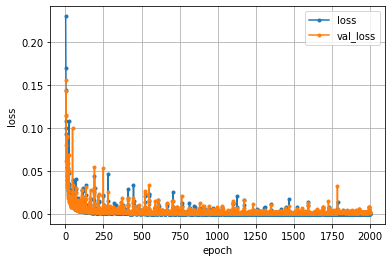

In [39]:
# 学習経過の可視化
loss     = history_1.history['loss']
val_loss = history_1.history['val_loss']

nb_epoch = len(loss)
for i in range(50):
  if max(loss)>0.3: 
    if i == 49:
      plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
      plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
      break
    else:
      loss = loss[1:]
      val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

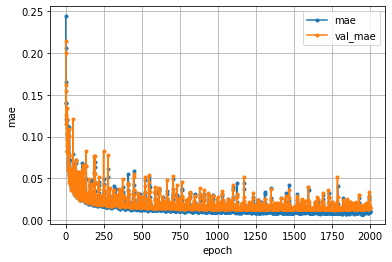

In [40]:
# 学習経過の可視化
mae     = history_1.history['mae']
val_mae = history_1.history['val_mae']

nb_epoch = len(mae)
for i in range(50):
  if max(mae)>0.3: 
    if i == 49:
      plt.plot(range(i,nb_epoch), mae, marker='.', label='mae')
      plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
      break
    else:
      mae = mae[1:]
      val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae, marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [41]:
# 学習モデルの保存
model_1.save(str(n)+"_random.seed("+str(seed)+")_train"+str(train)+"_raw.h5")

In [42]:
# model_2

# データの前処理


## 変数設定(各条件を変えてたくさん試すため)
train = 0.5                 #train:validのtrainデータの割合
seed = 2                       
random.seed(seed)           #乱数seed固定


## データ加工

### データ抽出(各データをランダムにシャッフル→train,valid,testに分割。各大きさのデータが同じ数だけ抽出される。)
for i in range (1,6):
  exec("lst_fs"+str(i)+"_shuffle = random.sample(lst_fs"+str(i)+", len(lst_fs"+str(i)+"))")  
  exec("lst_fs"+str(i)+"_train = lst_fs"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")       
  exec("lst_fs"+str(i)+"_valid = lst_fs"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]")          
  exec("lst_fs"+str(i)+"_test = lst_fs"+str(i)+"_shuffle["+str(int(n/5))+":-1]")
  exec("lst_fp"+str(i)+"_shuffle = random.sample(lst_fp"+str(i)+", len(lst_fp"+str(i)+"))")
  exec("lst_fp"+str(i)+"_train = lst_fp"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")
  exec("lst_fp"+str(i)+"_valid = lst_fp"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]") 
  exec("lst_fp"+str(i)+"_test = lst_fp"+str(i)+"_shuffle["+str(int(n/5))+":-1]")

### train,valid,testの各々について、大きさ、位置、表面温度分布データに分割
for i in range (1,6):
  exec("lst_x_fs"+str(i)+"_train = [r[0] for r in lst_fs"+str(i)+"_train]")
  exec("lst_x_fp"+str(i)+"_train = [r[0:2] for r in lst_fp"+str(i)+"_train]")
  exec("lst_y"+str(i)+"_train = [r[2:-1] for r in lst_fp"+str(i)+"_train]")
  exec("lst_x_fs"+str(i)+"_valid = [r[0] for r in lst_fs"+str(i)+"_valid]")
  exec("lst_x_fp"+str(i)+"_valid = [r[0:2] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_y"+str(i)+"_valid = [r[2:-1] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_x_fs"+str(i)+"_test = [r[0] for r in lst_fs"+str(i)+"_test]")
  exec("lst_x_fp"+str(i)+"_test = [r[0:2] for r in lst_fp"+str(i)+"_test]")
  exec("lst_y"+str(i)+"_test = [r[2:-1] for r in lst_fp"+str(i)+"_test]")

### データを結合(入力データ・正解データの大枠完成)
lst_x_fs_train = lst_x_fs1_train + lst_x_fs2_train + lst_x_fs3_train + lst_x_fs4_train + lst_x_fs5_train
lst_x_fp_train = lst_x_fp1_train + lst_x_fp2_train + lst_x_fp3_train + lst_x_fp4_train + lst_x_fp5_train
lst_y_train = lst_y1_train + lst_y2_train + lst_y3_train + lst_y4_train + lst_y5_train

lst_x_fs_valid = lst_x_fs1_valid + lst_x_fs2_valid + lst_x_fs3_valid + lst_x_fs4_valid + lst_x_fs5_valid
lst_x_fp_valid = lst_x_fp1_valid + lst_x_fp2_valid + lst_x_fp3_valid + lst_x_fp4_valid + lst_x_fp5_valid
lst_y_valid = lst_y1_valid + lst_y2_valid + lst_y3_valid + lst_y4_valid + lst_y5_valid

lst_x_fs_test = lst_x_fs1_test + lst_x_fs2_test + lst_x_fs3_test + lst_x_fs4_test + lst_x_fs5_test
lst_x_fp_test = lst_x_fp1_test + lst_x_fp2_test + lst_x_fp3_test + lst_x_fp4_test + lst_x_fp5_test
lst_y_test = lst_y1_test + lst_y2_test + lst_y3_test + lst_y4_test + lst_y5_test

### np.arrayで変換
lst_f0 = np.array(lst_f0, dtype=float)
lst_x_fs_train = np.array(lst_x_fs_train, dtype=int)
lst_x_fp_train = np.array(lst_x_fp_train, dtype=int)
lst_x_fs_valid = np.array(lst_x_fs_valid, dtype=int)
lst_x_fp_valid = np.array(lst_x_fp_valid, dtype=int)
lst_x_fs_test = np.array(lst_x_fs_test, dtype=int)
lst_x_fp_test = np.array(lst_x_fp_test, dtype=int)
lst_y_train = np.array(lst_y_train, dtype=float)
lst_y_valid = np.array(lst_y_valid, dtype=float)
lst_y_test = np.array(lst_y_test, dtype=float)

### 入力データを二次元化
x_fs_train = lst_x_fs_train.reshape(-1, 1)
x_fs_valid = lst_x_fs_valid.reshape(-1, 1)
x_fs_test = lst_x_fs_test.reshape(-1, 1)

### 温度分布データを、穴なし温度分布データとの差に変換
y_train = lst_y_train - lst_f0
y_valid = lst_y_valid - lst_f0
y_test = lst_y_test - lst_f0

### 入力データの正規化
scaler_x = MinMaxScaler()
x_fs_train_n = scaler_x.fit_transform(x_fs_train)
x_fs_valid_n = scaler_x.fit_transform(x_fs_valid)
x_fs_test_n = scaler_x.fit_transform(x_fs_test) 
x_fp_train_n = scaler_x.fit_transform(lst_x_fp_train)
x_fp_valid_n = scaler_x.fit_transform(lst_x_fp_valid)
x_fp_test_n = scaler_x.fit_transform(lst_x_fp_test) 

In [43]:
# NN

## 入力を定義
input1 = Input(shape=(1,))
input2 = Input(shape=(2,))

## 入力1から結合前まで
x = Dense(1, activation="linear")(input1)
x = Model(inputs=input1, outputs=x)

## 入力2から結合前まで
y = Dense(2, activation="linear")(input2)
y = Model(inputs=input2, outputs=y)

## 結合
combined = concatenate([x.output, y.output])

## 密結合
z = Dense(32, activation="relu")(combined)
z = Dense(512, activation="relu")(z)
z = Dense(256, activation="relu")(z)
z = Dense(128, activation="relu")(z)
z = Dense(50)(z)

## モデル定義とコンパイル
model_2 = Model(inputs=[x.input, y.input], outputs=z)
model_2.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [44]:
# 学習
epochs = 2000
batch_size = 64
history_2 = model_2.fit([x_fs_train_n, x_fp_train_n], y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=([x_fs_valid_n, x_fp_valid_n], y_valid))

Epoch 1/2000
32/32 [==============================] - 1s 16ms/step - loss: 0.2427 - mae: 0.2063 - val_loss: 0.4145 - val_mae: 0.1850
Epoch 2/2000
32/32 [==============================] - 0s 10ms/step - loss: 0.3359 - mae: 0.1777 - val_loss: 0.3603 - val_mae: 0.1735
Epoch 3/2000
32/32 [==============================] - 0s 10ms/step - loss: 0.1769 - mae: 0.1425 - val_loss: 0.2992 - val_mae: 0.1640
Epoch 4/2000
32/32 [==============================] - 0s 10ms/step - loss: 0.2197 - mae: 0.1615 - val_loss: 0.2869 - val_mae: 0.1492
Epoch 5/2000
32/32 [==============================] - 0s 9ms/step - loss: 0.1694 - mae: 0.1337 - val_loss: 0.2390 - val_mae: 0.1256
Epoch 6/2000
32/32 [==============================] - 0s 8ms/step - loss: 0.1383 - mae: 0.1059 - val_loss: 0.2005 - val_mae: 0.1151
Epoch 7/2000
32/32 [==============================] - 0s 7ms/step - loss: 0.1105 - mae: 0.1004 - val_loss: 0.2106 - val_mae: 0.1153
Epoch 8/2000
32/32 [==============================] - 0s 7ms/step - loss

In [45]:
# モデルの評価
score = model_2.evaluate([x_fs_test_n, x_fp_test_n], y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

192/192 [==============================] - 0s 1ms/step - loss: 0.0093 - mae: 0.0182
Test loss: 0.00928574800491333
Test mae: 0.018159883096814156


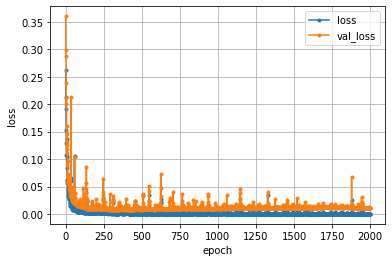

In [46]:
# 学習経過の可視化
loss     = history_2.history['loss']
val_loss = history_2.history['val_loss']

nb_epoch = len(loss)
for i in range(50):
  if max(loss)>0.3: 
    if i == 49:
      plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
      plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
      break
    else:
      loss = loss[1:]
      val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

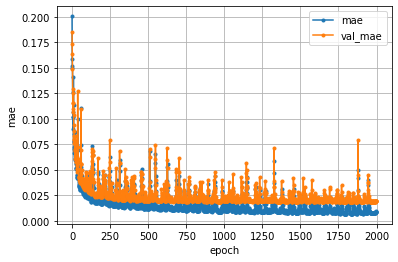

In [47]:
# 学習経過の可視化
mae     = history_2.history['mae']
val_mae = history_2.history['val_mae']

nb_epoch = len(mae)
for i in range(50):
  if max(mae)>0.3: 
    if i == 49:
      plt.plot(range(i,nb_epoch), mae, marker='.', label='mae')
      plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
      break
    else:
      mae = mae[1:]
      val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae, marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [48]:
# 学習モデルの保存
model_2.save(str(n)+"_random.seed("+str(seed)+")_train"+str(train)+"_raw.h5")

In [49]:
# model_3

# データの前処理


## 変数設定(各条件を変えてたくさん試すため)
train = 0.8                 #train:validのtrainデータの割合
seed = 3                       
random.seed(seed)           #乱数seed固定


## データ加工

### データ抽出(各データをランダムにシャッフル→train,valid,testに分割。各大きさのデータが同じ数だけ抽出される。)
for i in range (1,6):
  exec("lst_fs"+str(i)+"_shuffle = random.sample(lst_fs"+str(i)+", len(lst_fs"+str(i)+"))")  
  exec("lst_fs"+str(i)+"_train = lst_fs"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")       
  exec("lst_fs"+str(i)+"_valid = lst_fs"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]")          
  exec("lst_fs"+str(i)+"_test = lst_fs"+str(i)+"_shuffle["+str(int(n/5))+":-1]")
  exec("lst_fp"+str(i)+"_shuffle = random.sample(lst_fp"+str(i)+", len(lst_fp"+str(i)+"))")
  exec("lst_fp"+str(i)+"_train = lst_fp"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")
  exec("lst_fp"+str(i)+"_valid = lst_fp"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]") 
  exec("lst_fp"+str(i)+"_test = lst_fp"+str(i)+"_shuffle["+str(int(n/5))+":-1]")

### train,valid,testの各々について、大きさ、位置、表面温度分布データに分割
for i in range (1,6):
  exec("lst_x_fs"+str(i)+"_train = [r[0] for r in lst_fs"+str(i)+"_train]")
  exec("lst_x_fp"+str(i)+"_train = [r[0:2] for r in lst_fp"+str(i)+"_train]")
  exec("lst_y"+str(i)+"_train = [r[2:-1] for r in lst_fp"+str(i)+"_train]")
  exec("lst_x_fs"+str(i)+"_valid = [r[0] for r in lst_fs"+str(i)+"_valid]")
  exec("lst_x_fp"+str(i)+"_valid = [r[0:2] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_y"+str(i)+"_valid = [r[2:-1] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_x_fs"+str(i)+"_test = [r[0] for r in lst_fs"+str(i)+"_test]")
  exec("lst_x_fp"+str(i)+"_test = [r[0:2] for r in lst_fp"+str(i)+"_test]")
  exec("lst_y"+str(i)+"_test = [r[2:-1] for r in lst_fp"+str(i)+"_test]")

### データを結合(入力データ・正解データの大枠完成)
lst_x_fs_train = lst_x_fs1_train + lst_x_fs2_train + lst_x_fs3_train + lst_x_fs4_train + lst_x_fs5_train
lst_x_fp_train = lst_x_fp1_train + lst_x_fp2_train + lst_x_fp3_train + lst_x_fp4_train + lst_x_fp5_train
lst_y_train = lst_y1_train + lst_y2_train + lst_y3_train + lst_y4_train + lst_y5_train

lst_x_fs_valid = lst_x_fs1_valid + lst_x_fs2_valid + lst_x_fs3_valid + lst_x_fs4_valid + lst_x_fs5_valid
lst_x_fp_valid = lst_x_fp1_valid + lst_x_fp2_valid + lst_x_fp3_valid + lst_x_fp4_valid + lst_x_fp5_valid
lst_y_valid = lst_y1_valid + lst_y2_valid + lst_y3_valid + lst_y4_valid + lst_y5_valid

lst_x_fs_test = lst_x_fs1_test + lst_x_fs2_test + lst_x_fs3_test + lst_x_fs4_test + lst_x_fs5_test
lst_x_fp_test = lst_x_fp1_test + lst_x_fp2_test + lst_x_fp3_test + lst_x_fp4_test + lst_x_fp5_test
lst_y_test = lst_y1_test + lst_y2_test + lst_y3_test + lst_y4_test + lst_y5_test

### np.arrayで変換
lst_f0 = np.array(lst_f0, dtype=float)
lst_x_fs_train = np.array(lst_x_fs_train, dtype=int)
lst_x_fp_train = np.array(lst_x_fp_train, dtype=int)
lst_x_fs_valid = np.array(lst_x_fs_valid, dtype=int)
lst_x_fp_valid = np.array(lst_x_fp_valid, dtype=int)
lst_x_fs_test = np.array(lst_x_fs_test, dtype=int)
lst_x_fp_test = np.array(lst_x_fp_test, dtype=int)
lst_y_train = np.array(lst_y_train, dtype=float)
lst_y_valid = np.array(lst_y_valid, dtype=float)
lst_y_test = np.array(lst_y_test, dtype=float)

### 入力データを二次元化
x_fs_train = lst_x_fs_train.reshape(-1, 1)
x_fs_valid = lst_x_fs_valid.reshape(-1, 1)
x_fs_test = lst_x_fs_test.reshape(-1, 1)

### 温度分布データを、穴なし温度分布データとの差に変換
y_train = lst_y_train - lst_f0
y_valid = lst_y_valid - lst_f0
y_test = lst_y_test - lst_f0

### 入力データの正規化
scaler_x = MinMaxScaler()
x_fs_train_n = scaler_x.fit_transform(x_fs_train)
x_fs_valid_n = scaler_x.fit_transform(x_fs_valid)
x_fs_test_n = scaler_x.fit_transform(x_fs_test) 
x_fp_train_n = scaler_x.fit_transform(lst_x_fp_train)
x_fp_valid_n = scaler_x.fit_transform(lst_x_fp_valid)
x_fp_test_n = scaler_x.fit_transform(lst_x_fp_test) 

In [50]:
# NN

## 入力を定義
input1 = Input(shape=(1,))
input2 = Input(shape=(2,))

## 入力1から結合前まで
x = Dense(1, activation="linear")(input1)
x = Model(inputs=input1, outputs=x)

## 入力2から結合前まで
y = Dense(2, activation="linear")(input2)
y = Model(inputs=input2, outputs=y)

## 結合
combined = concatenate([x.output, y.output])

## 密結合
z = Dense(32, activation="relu")(combined)
z = Dense(512, activation="relu")(z)
z = Dense(256, activation="relu")(z)
z = Dense(128, activation="relu")(z)
z = Dense(50)(z)

## モデル定義とコンパイル
model_3 = Model(inputs=[x.input, y.input], outputs=z)
model_3.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [51]:
# 学習
epochs = 2000
batch_size = 64
history_3 = model_3.fit([x_fs_train_n, x_fp_train_n], y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=([x_fs_valid_n, x_fp_valid_n], y_valid))

Epoch 1/2000
50/50 [==============================] - 1s 10ms/step - loss: 0.3056 - mae: 0.2141 - val_loss: 0.2583 - val_mae: 0.1802
Epoch 2/2000
50/50 [==============================] - 0s 7ms/step - loss: 0.2478 - mae: 0.1696 - val_loss: 0.2273 - val_mae: 0.1808
Epoch 3/2000
50/50 [==============================] - 0s 6ms/step - loss: 0.2555 - mae: 0.1780 - val_loss: 0.2124 - val_mae: 0.1590
Epoch 4/2000
50/50 [==============================] - 0s 6ms/step - loss: 0.2361 - mae: 0.1540 - val_loss: 0.1918 - val_mae: 0.1395
Epoch 5/2000
50/50 [==============================] - 0s 6ms/step - loss: 0.2087 - mae: 0.1339 - val_loss: 0.1763 - val_mae: 0.1429
Epoch 6/2000
50/50 [==============================] - 0s 6ms/step - loss: 0.1553 - mae: 0.1292 - val_loss: 0.1648 - val_mae: 0.1367
Epoch 7/2000
50/50 [==============================] - 0s 5ms/step - loss: 0.1560 - mae: 0.1291 - val_loss: 0.1301 - val_mae: 0.1181
Epoch 8/2000
50/50 [==============================] - 0s 6ms/step - loss: 0

In [52]:
# モデルの評価
score = model_3.evaluate([x_fs_test_n, x_fp_test_n], y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

192/192 [==============================] - 0s 2ms/step - loss: 0.0053 - mae: 0.0157
Test loss: 0.005259145051240921
Test mae: 0.015674814581871033


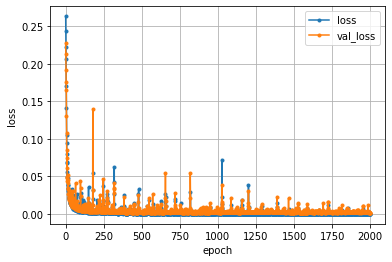

In [53]:
# 学習経過の可視化
loss     = history_3.history['loss']
val_loss = history_3.history['val_loss']

nb_epoch = len(loss)
for i in range(50):
  if max(loss)>0.3: 
    if i == 49:
      plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
      plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
      break
    else:
      loss = loss[1:]
      val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

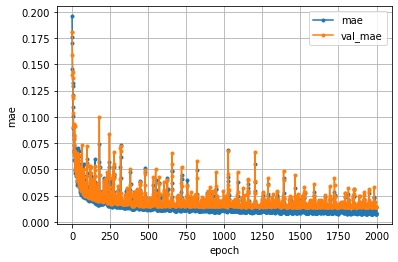

In [54]:
# 学習経過の可視化
mae     = history_3.history['mae']
val_mae = history_3.history['val_mae']

nb_epoch = len(mae)
for i in range(50):
  if max(mae)>0.3: 
    if i == 49:
      plt.plot(range(i,nb_epoch), mae, marker='.', label='mae')
      plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
      break
    else:
      mae = mae[1:]
      val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae, marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [55]:
# 学習モデルの保存
model_3.save(str(n)+"_random.seed("+str(seed)+")_train"+str(train)+"_raw.h5")

In [56]:
# model_4

# データの前処理


## 変数設定(各条件を変えてたくさん試すため)
train = 0.5                 #train:validのtrainデータの割合
seed = 3                       
random.seed(seed)           #乱数seed固定


## データ加工

### データ抽出(各データをランダムにシャッフル→train,valid,testに分割。各大きさのデータが同じ数だけ抽出される。)
for i in range (1,6):
  exec("lst_fs"+str(i)+"_shuffle = random.sample(lst_fs"+str(i)+", len(lst_fs"+str(i)+"))")  
  exec("lst_fs"+str(i)+"_train = lst_fs"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")       
  exec("lst_fs"+str(i)+"_valid = lst_fs"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]")          
  exec("lst_fs"+str(i)+"_test = lst_fs"+str(i)+"_shuffle["+str(int(n/5))+":-1]")
  exec("lst_fp"+str(i)+"_shuffle = random.sample(lst_fp"+str(i)+", len(lst_fp"+str(i)+"))")
  exec("lst_fp"+str(i)+"_train = lst_fp"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")
  exec("lst_fp"+str(i)+"_valid = lst_fp"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]") 
  exec("lst_fp"+str(i)+"_test = lst_fp"+str(i)+"_shuffle["+str(int(n/5))+":-1]")

### train,valid,testの各々について、大きさ、位置、表面温度分布データに分割
for i in range (1,6):
  exec("lst_x_fs"+str(i)+"_train = [r[0] for r in lst_fs"+str(i)+"_train]")
  exec("lst_x_fp"+str(i)+"_train = [r[0:2] for r in lst_fp"+str(i)+"_train]")
  exec("lst_y"+str(i)+"_train = [r[2:-1] for r in lst_fp"+str(i)+"_train]")
  exec("lst_x_fs"+str(i)+"_valid = [r[0] for r in lst_fs"+str(i)+"_valid]")
  exec("lst_x_fp"+str(i)+"_valid = [r[0:2] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_y"+str(i)+"_valid = [r[2:-1] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_x_fs"+str(i)+"_test = [r[0] for r in lst_fs"+str(i)+"_test]")
  exec("lst_x_fp"+str(i)+"_test = [r[0:2] for r in lst_fp"+str(i)+"_test]")
  exec("lst_y"+str(i)+"_test = [r[2:-1] for r in lst_fp"+str(i)+"_test]")

### データを結合(入力データ・正解データの大枠完成)
lst_x_fs_train = lst_x_fs1_train + lst_x_fs2_train + lst_x_fs3_train + lst_x_fs4_train + lst_x_fs5_train
lst_x_fp_train = lst_x_fp1_train + lst_x_fp2_train + lst_x_fp3_train + lst_x_fp4_train + lst_x_fp5_train
lst_y_train = lst_y1_train + lst_y2_train + lst_y3_train + lst_y4_train + lst_y5_train

lst_x_fs_valid = lst_x_fs1_valid + lst_x_fs2_valid + lst_x_fs3_valid + lst_x_fs4_valid + lst_x_fs5_valid
lst_x_fp_valid = lst_x_fp1_valid + lst_x_fp2_valid + lst_x_fp3_valid + lst_x_fp4_valid + lst_x_fp5_valid
lst_y_valid = lst_y1_valid + lst_y2_valid + lst_y3_valid + lst_y4_valid + lst_y5_valid

lst_x_fs_test = lst_x_fs1_test + lst_x_fs2_test + lst_x_fs3_test + lst_x_fs4_test + lst_x_fs5_test
lst_x_fp_test = lst_x_fp1_test + lst_x_fp2_test + lst_x_fp3_test + lst_x_fp4_test + lst_x_fp5_test
lst_y_test = lst_y1_test + lst_y2_test + lst_y3_test + lst_y4_test + lst_y5_test

### np.arrayで変換
lst_f0 = np.array(lst_f0, dtype=float)
lst_x_fs_train = np.array(lst_x_fs_train, dtype=int)
lst_x_fp_train = np.array(lst_x_fp_train, dtype=int)
lst_x_fs_valid = np.array(lst_x_fs_valid, dtype=int)
lst_x_fp_valid = np.array(lst_x_fp_valid, dtype=int)
lst_x_fs_test = np.array(lst_x_fs_test, dtype=int)
lst_x_fp_test = np.array(lst_x_fp_test, dtype=int)
lst_y_train = np.array(lst_y_train, dtype=float)
lst_y_valid = np.array(lst_y_valid, dtype=float)
lst_y_test = np.array(lst_y_test, dtype=float)

### 入力データを二次元化
x_fs_train = lst_x_fs_train.reshape(-1, 1)
x_fs_valid = lst_x_fs_valid.reshape(-1, 1)
x_fs_test = lst_x_fs_test.reshape(-1, 1)

### 温度分布データを、穴なし温度分布データとの差に変換
y_train = lst_y_train - lst_f0
y_valid = lst_y_valid - lst_f0
y_test = lst_y_test - lst_f0

### 入力データの正規化
scaler_x = MinMaxScaler()
x_fs_train_n = scaler_x.fit_transform(x_fs_train)
x_fs_valid_n = scaler_x.fit_transform(x_fs_valid)
x_fs_test_n = scaler_x.fit_transform(x_fs_test) 
x_fp_train_n = scaler_x.fit_transform(lst_x_fp_train)
x_fp_valid_n = scaler_x.fit_transform(lst_x_fp_valid)
x_fp_test_n = scaler_x.fit_transform(lst_x_fp_test) 

In [57]:
# NN

## 入力を定義
input1 = Input(shape=(1,))
input2 = Input(shape=(2,))

## 入力1から結合前まで
x = Dense(1, activation="linear")(input1)
x = Model(inputs=input1, outputs=x)

## 入力2から結合前まで
y = Dense(2, activation="linear")(input2)
y = Model(inputs=input2, outputs=y)

## 結合
combined = concatenate([x.output, y.output])

## 密結合
z = Dense(32, activation="relu")(combined)
z = Dense(512, activation="relu")(z)
z = Dense(256, activation="relu")(z)
z = Dense(128, activation="relu")(z)
z = Dense(50)(z)

## モデル定義とコンパイル
model_4 = Model(inputs=[x.input, y.input], outputs=z)
model_4.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [58]:
# 学習
epochs = 2000
batch_size = 64
history_4 = model_4.fit([x_fs_train_n, x_fp_train_n], y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=([x_fs_valid_n, x_fp_valid_n], y_valid))

Epoch 1/2000
32/32 [==============================] - 1s 14ms/step - loss: 0.4665 - mae: 0.2697 - val_loss: 0.3325 - val_mae: 0.2341
Epoch 2/2000
32/32 [==============================] - 0s 9ms/step - loss: 0.3788 - mae: 0.2372 - val_loss: 0.3190 - val_mae: 0.2170
Epoch 3/2000
32/32 [==============================] - 0s 8ms/step - loss: 0.2376 - mae: 0.1928 - val_loss: 0.2912 - val_mae: 0.2002
Epoch 4/2000
32/32 [==============================] - 0s 8ms/step - loss: 0.3497 - mae: 0.1879 - val_loss: 0.2657 - val_mae: 0.1803
Epoch 5/2000
32/32 [==============================] - 0s 7ms/step - loss: 0.3406 - mae: 0.1884 - val_loss: 0.2157 - val_mae: 0.1980
Epoch 6/2000
32/32 [==============================] - 0s 7ms/step - loss: 0.1950 - mae: 0.1748 - val_loss: 0.1382 - val_mae: 0.1231
Epoch 7/2000
32/32 [==============================] - 0s 7ms/step - loss: 0.2032 - mae: 0.1309 - val_loss: 0.1605 - val_mae: 0.1372
Epoch 8/2000
32/32 [==============================] - 0s 9ms/step - loss: 0

In [59]:
# モデルの評価
score = model_4.evaluate([x_fs_test_n, x_fp_test_n], y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

192/192 [==============================] - 0s 1ms/step - loss: 0.0088 - mae: 0.0182
Test loss: 0.008842376060783863
Test mae: 0.018151890486478806


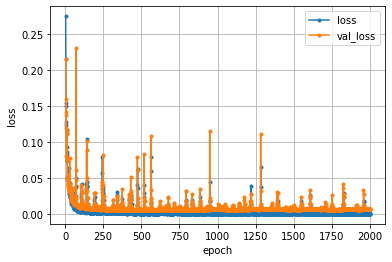

In [60]:
# 学習経過の可視化
loss     = history_4.history['loss']
val_loss = history_4.history['val_loss']

nb_epoch = len(loss)
for i in range(50):
  if max(loss)>0.3: 
    if i == 49:
      plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
      plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
      break
    else:
      loss = loss[1:]
      val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

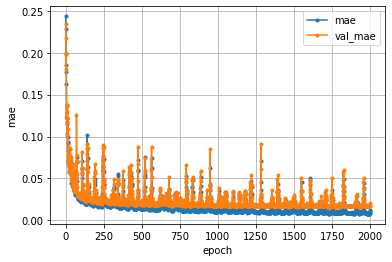

In [61]:
# 学習経過の可視化
mae     = history_4.history['mae']
val_mae = history_4.history['val_mae']

nb_epoch = len(mae)
for i in range(50):
  if max(mae)>0.3: 
    if i == 49:
      plt.plot(range(i,nb_epoch), mae, marker='.', label='mae')
      plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
      break
    else:
      mae = mae[1:]
      val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae, marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [62]:
# 学習モデルの保存
model_4.save(str(n)+"_random.seed("+str(seed)+")_train"+str(train)+"_raw.h5")